In [61]:
#libraries
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import warnings
from matplotlib.dates import DateFormatter
from transform_functions import *

In [62]:
#graphics set up
palette_1 = sns.color_palette()
p_1_hex = palette_1.as_hex()
p_1_blue = palette_1[0]
p_1_red = palette_1[3]
palette_2 = sns.color_palette("Paired")
#single plot set up
fig_width = 10
fig_height = 8
##grid plots set up
fontsize_grid = 30
y_grid = 0.93
#hide warnings
warnings.filterwarnings('ignore')
#max number of rows in pd data frame
pd.set_option('display.min_rows', 100)
plt.style.available
#set style of plots
plt.style.use('seaborn-v0_8-whitegrid')
#floats instead of scientific notation
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# Carvago - Data Exploration

## Introduction

Data set used in this project comes from website carvago.com, belonging to the company of the same name which specializes in reselling of used cars between different European countries. The data was downloaded on 24th of March 2023 and contains over 650 000 observations of used cars with 29 attributes. The goal of this report is to perform initial exploration of the data set and assess the quality of the data which will then be transformed based on the knowledge gained from it and then used in the training of a model used for prediction of used car prices. 

In [63]:
#read data
data = pd.read_csv("../data/car_data.csv", encoding = "ISO-8859-1")
data.head()

,id,title,cubic_capacity,power,number_of_seats,fuel_type,transmission,fuel_consumption_combined,carbon_dioxide_emission,drive,...,color,manufacture_date,external_id,price,model,features_all,brand,seller_type,seller_country,seller_rating
0,54408847,Mitsubishi Space Star 52 kW,1193.000,52.000,5.000,Petrol,Manual,4.500,104.000,4x2,...,White,01/12/2022,mobile_de-357402368,361990,Space Star,"['MP3 interface', 'Power assisted steering', '...",Mitsubishi,Dealership,Germany,4.600
1,53378726,Volkswagen Caddy Combi 1.6 TDI BlueMotion Tech...,1598.000,75.000,5.000,Diesel,Automatic,5.200,136.000,4x2,...,White,01/07/2014,autoscout24-71aa69f3-20a5-4028-8333-3bcf112b703f,305490,Caddy,"['Power assisted steering', 'ABS', 'ESP', 'Tra...",Volkswagen,Used cars seller,Belgium,4.500
2,54227793,Volkswagen Polo 1.2 TSI Lounge 66 kW,1197.000,66.000,5.000,Petrol,Manual,4.700,107.000,4x2,...,Brown,01/10/2015,mobile_de-360085596,328990,Polo,"['Sport package', 'Power assisted steering', '...",Volkswagen,Dealership,Germany,4.700
3,54565397,Citroen C5 Tourer HDi 165 FAP Automatic 120 kW,1997.000,120.000,5.000,Diesel,Automatic,6.900,179.000,4x2,...,Blue,01/12/2010,autoscout24-eeef32e4-cff3-4df5-bc51-d1d36575d32e,120490,C5,"['MP3 interface', 'Sport package', 'Power assi...",CitroÃ«n,Used cars seller,Germany,5.000
4,53497768,Ford EcoSport 1.0 92 kW,1000.000,92.000,5.000,Petrol,Manual,6.000,134.000,4x2,...,Grey,01/10/2017,mobile_de-358352862,401490,EcoSport,"['MP3 interface', 'Power assisted steering', '...",Ford,Dealership,Germany,4.900


In [64]:
features_df = pd.read_csv('../data/features_df.csv')
features_df.head()

,Apple CarPlay,DVD player,Pedestrian protection system,Removable rear seats,Heated rear seats,Parking assist system self-steering,Full service history,Front electric windows,Head-up display,Start-stop system,...,Service book,Electrically heated side mirrors,Monitors in headrests,Rear seats ISOFIX points,ABS,Roll bar,Electric tailgate,Ventilated front seats,"Emergency braking assist (EBA, ABS)",Central locking
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,1,0,1,1,0,0,0,0,1


In [65]:
#constants
date_download = datetime.datetime(2023, 3, 24) #date on which the data set was downloaded 
month_download = datetime.datetime(2023, 3, 1) #first day of month the data set was downloaded

## categorical variables to be included in plots
cat_cols_grid = ['fuel_type', 'transmission', 'drive', 'car_style',
                'emission_class', 'door_count', 'color', 'seller_country', 'number_of_seats']

## numerical variables to be included in plots
numerical_cols_grid = ['cubic_capacity', 'power', 'fuel_consumption_combined',
                       'carbon_dioxide_emission', 'mileage', 'price']

##minimal number of observations for a carmaker to be included in the plot separately
carmaker_min = 5000

## Data Types

In [66]:
#types of variables
print("number of variables: " + str(len(data.columns)))
data_types = data.dtypes.to_frame()
data_types.columns = ["data_type"]
data_types

number of variables: 29


,data_type
id,int64
title,object
cubic_capacity,float64
power,float64
number_of_seats,float64
fuel_type,object
transmission,object
fuel_consumption_combined,float64
carbon_dioxide_emission,float64
drive,object


In [67]:
#counts of different types of variables
data_types_counts = data_types.value_counts()
print("Type Counts: ")
data_types_counts.to_frame()

Type Counts: 


,count
data_type,
object,19
float64,7
int64,3


In the data set there are available 29 different attributes for the analysis. We have info on car brand and model, technical attributes (power, cubic_capacity, ...), mileage of the vehicle, its fuel consumption, month of the manufacturing and registration among other attributes. We can see that 10 of the variables have numerical values, remaining 19 attributes are categorical variables.

## Unique Categories of Categorical Variables

In [68]:
pd.set_option('display.max_colwidth', 150)
df_cat_unique_vals = pd.DataFrame()
df_cat_unique_vals["unique_vals"] = (data[cat_cols_grid]
                                     .apply(lambda col: col.unique()))
df_cat_unique_vals["n_unique"] = (data[cat_cols_grid]
                                  .apply(lambda col: len(col.unique())))
df_cat_unique_vals

,unique_vals,n_unique
fuel_type,"[Petrol, Diesel, Electric, Hybrid, LPG, CNG, Other fuel type, Hydrogen, Ethanol]",9
transmission,"[Manual, Automatic]",2
drive,"[4x2, 4x4, Front wheel drive]",3
car_style,"[Compact, MPV/VAN, Station Wagon, SUV / offroad, Sedans / saloons, Pick-up, Other car styles, Cargo VAN, nan, Coupe, Cabriolet]",11
emission_class,"[Euro 6d, Euro 5, Euro 6, No emission class, Euro 6c, Euro 4, Euro 6d-TEMP, nan, Euro 1, Euro 3, Euro 2]",11
door_count,"[4/5 doors, nan, 2/3 doors, 6/7 doors]",4
color,"[White, Brown, Blue, Grey, Black, nan, Red, Beige, Silver, Green, Yellow, Gold, Orange, Purple]",14
seller_country,"[Germany, Belgium, Netherlands, Spain, Italy, France, Sweden, Romania, Luxembourg, Poland, Austria, Slovakia, Czech Republic]",13
number_of_seats,"[5.0, nan, 2.0, 3.0, 4.0, 6.0, 7.0, 1.0, 8.0, 9.0, 45.0, 58.0, 20.0, 17.0]",14


In [69]:
pd.reset_option('display.max_colwidth')

At first I look at the unique values that individual categorical variables can attain. There is only 1 column with only 2 categories, for most of the other categorical variables we have much more possible values, in most cases at least 10. Important insight is also the fact that there can be several different types of engines found in the data set. There are not only combustion engines but electric, hybrid, LPG, CNG, hydrogen and ethanol are also represented. The inclusion of all of these types makes the prediction problem more complex. The inclusion of electric vehicle would for example make it impossible to use cubic capacity as a predictor and it would also make it more challenging to include the fuel consumption since it is  measured in different units between electric and fuel combustion engines. Further, it would also increase correlation between some of the variables, given that all electric vehicles have 0 carbon dioxide emissions and they all have automatic tranmisssion, nevertheless this is not a big concern in the case of prediction problem. Another insight that can be gained from the table above is that for same variables data cleaning will be definitely needed, for example,  there are observations with unrealistic high number of seats, or with two different values describing the same type of drive.

## Missing values

In [70]:
data_ce = data[(data['fuel_type'] == 'Diesel') | 
               (data['fuel_type'] == 'Petrol') ]
NA_ce_counts = create_NA_counts_table(data_ce, 'NA_Combust_Engines_counts')
NA_counts = create_NA_counts_table(data, 'NA_All_counts')
NA_df_counts = pd.concat([NA_ce_counts, NA_counts], axis=1)
NA_df_counts

,NA_Combust_Engines_counts,(%),NA_All_counts,(%)
id,0,0.000,0,0.000
title,0,0.000,0,0.000
cubic_capacity,1729,0.299,29567,4.394
power,0,0.000,1,0.000
number_of_seats,29045,5.021,36982,5.497
fuel_type,0,0.000,0,0.000
transmission,0,0.000,0,0.000
fuel_consumption_combined,2385,0.412,20992,3.120
carbon_dioxide_emission,55,0.010,58,0.009
drive,0,0.000,0,0.000


Looking at the rates of misssing values, there are 3 variables with at least 10 % of them - equipment_version, number_of_owners - describing number of previous owners of a car, seller_rating (user rating of the dealership which currently owns the car). Given how the data set  would have to be restricted in number of observations in order to use them in the used price prediction model I decided to exclude them and they are not further dealt with in this report. Equipement version would not have any use anyway given how many different values it can attain but I am nevertheless loosing some information in the fact that I can not make use of the remaining two variables. There are 7 other variables with significant number of observations missing, in case of one of them - cubic capacity, this is caused by the fact that there is a significant number of electic vehicles in the data set as mentioned earlier.  

In [71]:
#droping columns with a 'majority' of missing values
data_woNA = data.drop(columns=['equipment_version', 'seller_rating',
                        'model_edition', 'number_of_owners'])

### Comparing Means of Data Set of Observations with Missing Values with the Means of the Whole Data Set

In [72]:
nonna_df = data_woNA.dropna()
na_df = data_woNA[data_woNA.isnull().any(axis = 1)]

In [73]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [74]:
na_means = (na_df
            .select_dtypes(include='number')
            .mean()
            .to_frame(name='NA_MEAN'))
nonna_means = (nonna_df
              .select_dtypes(include='number')
              .mean()
              .to_frame(name='NON_NA_MEAN'))
orig_means = (data_woNA
              .select_dtypes(include='number')
              .mean()
              .to_frame(name='ORIG_MEAN'))
na_comp = pd.concat([na_means, nonna_means, orig_means], axis=1)
n_obs = (pd.Series([na_df.shape[0], nonna_df.shape[0], data.shape[0]])
        .to_frame(name='n_obs')
        .T)
n_obs.columns = ["NA_MEAN", "NON_NA_MEAN", "ORIG_MEAN"]
missing_count = (na_df
                 .select_dtypes(include='number')
                 .isna()
                 .sum()
                 .to_frame(name='MISS_COUNT'))
na_comp = pd.concat([n_obs, na_comp], axis=0)
na_comp = pd.concat([na_comp, missing_count], axis=1)
na_comp = na_comp.drop(['id'])
na_comp

,NA_MEAN,NON_NA_MEAN,ORIG_MEAN,MISS_COUNT
n_obs,92200.000,580626.000,672826.000,NaN
cubic_capacity,1843.272,1751.370,1760.319,29567.000
power,147.875,125.429,128.505,1.000
number_of_seats,4.743,4.924,4.909,36982.000
fuel_consumption_combined,7.452,5.480,5.695,20992.000
carbon_dioxide_emission,91.615,130.835,125.464,58.000
mileage,34710.635,41233.744,40339.856,0.000
price,1051624.978,855814.393,882647.090,0.000


At the first look, it may seem that there are not significant differences in how the distributions of numerical variables change after excluding the missing values.

## Categorical Variables 

In the next section, I focus on the exploratory analysis of categorical variables.

### Variables Distributions

#### Car Makers

The first categorical variable to be analysed is the car brand.

<Axes: title={'center': 'Car Makers by their Share in the Data Set'}, xlabel='brand', ylabel='share'>

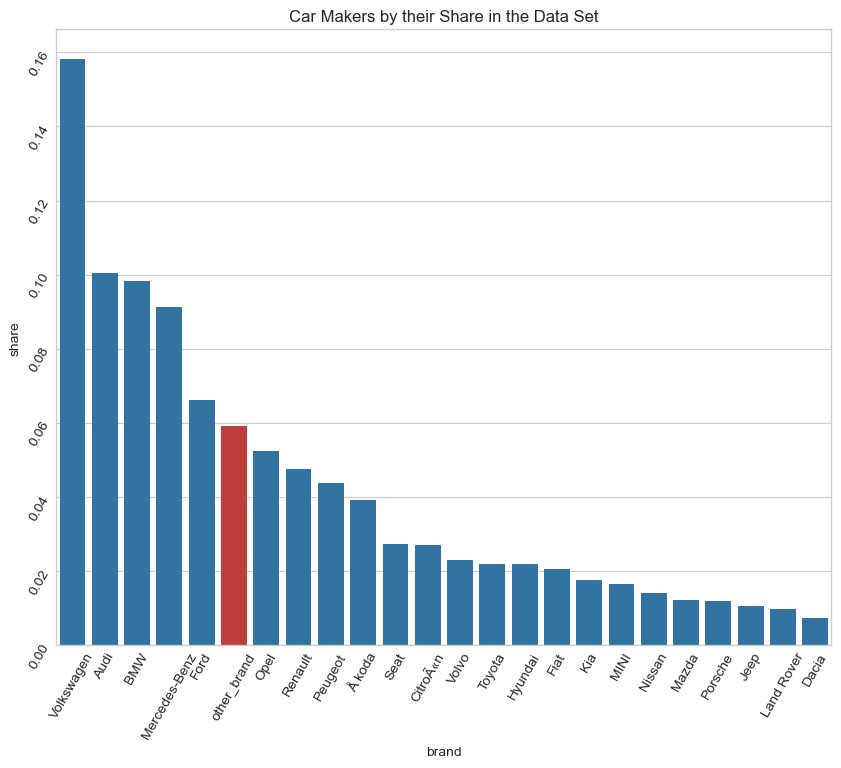

In [75]:
carmakers_df =  create_share_df(df=data_woNA, 
                                col="brand", 
                                min_threshold=carmaker_min, 
                                color=p_1_blue, 
                                color_other=p_1_red)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.set_title("Car Makers by their Share in the Data Set")
ax.tick_params(labelrotation=60)
sns.barplot(data=carmakers_df, 
            x=carmakers_df.index, 
            y="share",
            palette=carmakers_df["colours"], 
            ax=ax)

Looking at the barplot with shares of individual carmakers in the data set, we can see that they are not really proportionally dsitributed. Over 40 % observations in the data set belong to 4 major German carmakers - Volkswagen, Audi, BMW and Mercedes-Benz. There are 18 other car brands with at least 5000 observations (0.007 share in the dataset) and 6 % of the observations belong to other car makers with smaller number of observations. 

#### Features

In the data set, there is also available data on over 100 different types of accessories that can be included in the car equipment.

In [76]:
feature_shares = features_df[(features_df != 0).any(axis=1)]
feature_shares = (feature_shares.sum() / feature_shares.shape[0]).round(10)
feature_shares = pd.DataFrame(feature_shares)
feature_shares.columns = ['share']

In [77]:
print("5 attributes with biggest share: ")
feature_shares.sort_values(by='share', ascending=False).head()

5 attributes with biggest share: 


,share
ABS,0.903
ESP,0.887
Front electric windows,0.858
Side mirrors with electic adjustment,0.845
Central locking,0.840


In [78]:
print("5 attributes with lowest share: ")
feature_shares.sort_values(by='share', ascending=False).tail()

5 attributes with lowest share: 


,share
Ventilated rear seats,0.000
Side steps,0.000
Central diff. lock,0.000
Service book,0.000
Monitors in headrests,0.000


From looking on the shares of individual car gadgets it unfortunately seems that the data is not of much high of a quality in this regard. Given that for almost twenty years new cars sold in EU are required to have ABS in their equipement and most cars in the data set are manufactured later than in 2004 (see later section Month of Manufacture and Month of Registration), the fact that less than 80 % have this technology according to our data set indicates that I deal with incomplete data. In case of ABS, the corretion is simple, assigning the feature to all observations in the data set but this can not be clearly done with all of the types of equipement found in the data set. 

In [79]:
data_woNA['feature_count'] = features_df.sum(axis=1)

In the data set, there is  available data on over 100 different types of accessories that can be included in the car equipment. Given the imperfection in the collection of  data on individual types of car equipement and time consuming nature of most other approaches  I decided for including them as 1 composed variable describing how many individual features car has. In other cases with more perfectly collected data and having more time for the task, probably more appropriate approach would be to at least separate different kind of features in separate categories which would describe how equiped the car is in each of them. 

<Axes: title={'center': 'Relationship between number of features and price of vehicle'}, xlabel='feature_count', ylabel='price'>

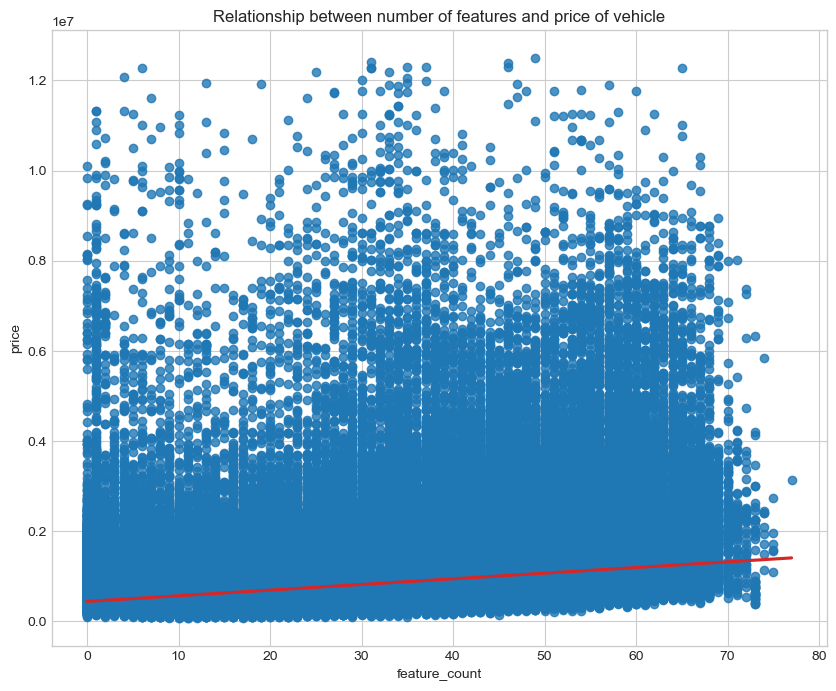

In [80]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.set_title("Relationship between number of features and price of vehicle")
sns.regplot(data=data_woNA, 
            x='feature_count',  
            y="price",
            ax=ax, 
            scatter_kws={"color": p_1_blue}, 
            line_kws={"color": p_1_red})

From the look of the graph above, we can see that there seem to be some relationship between number of features and price of the car, even though it must be mentioned that I do not control for any variables that may be corelated with the number of features and price at the same time so it serves as only an rough approximation of the relationship between these two variables. 

#### Other Categorical Variables

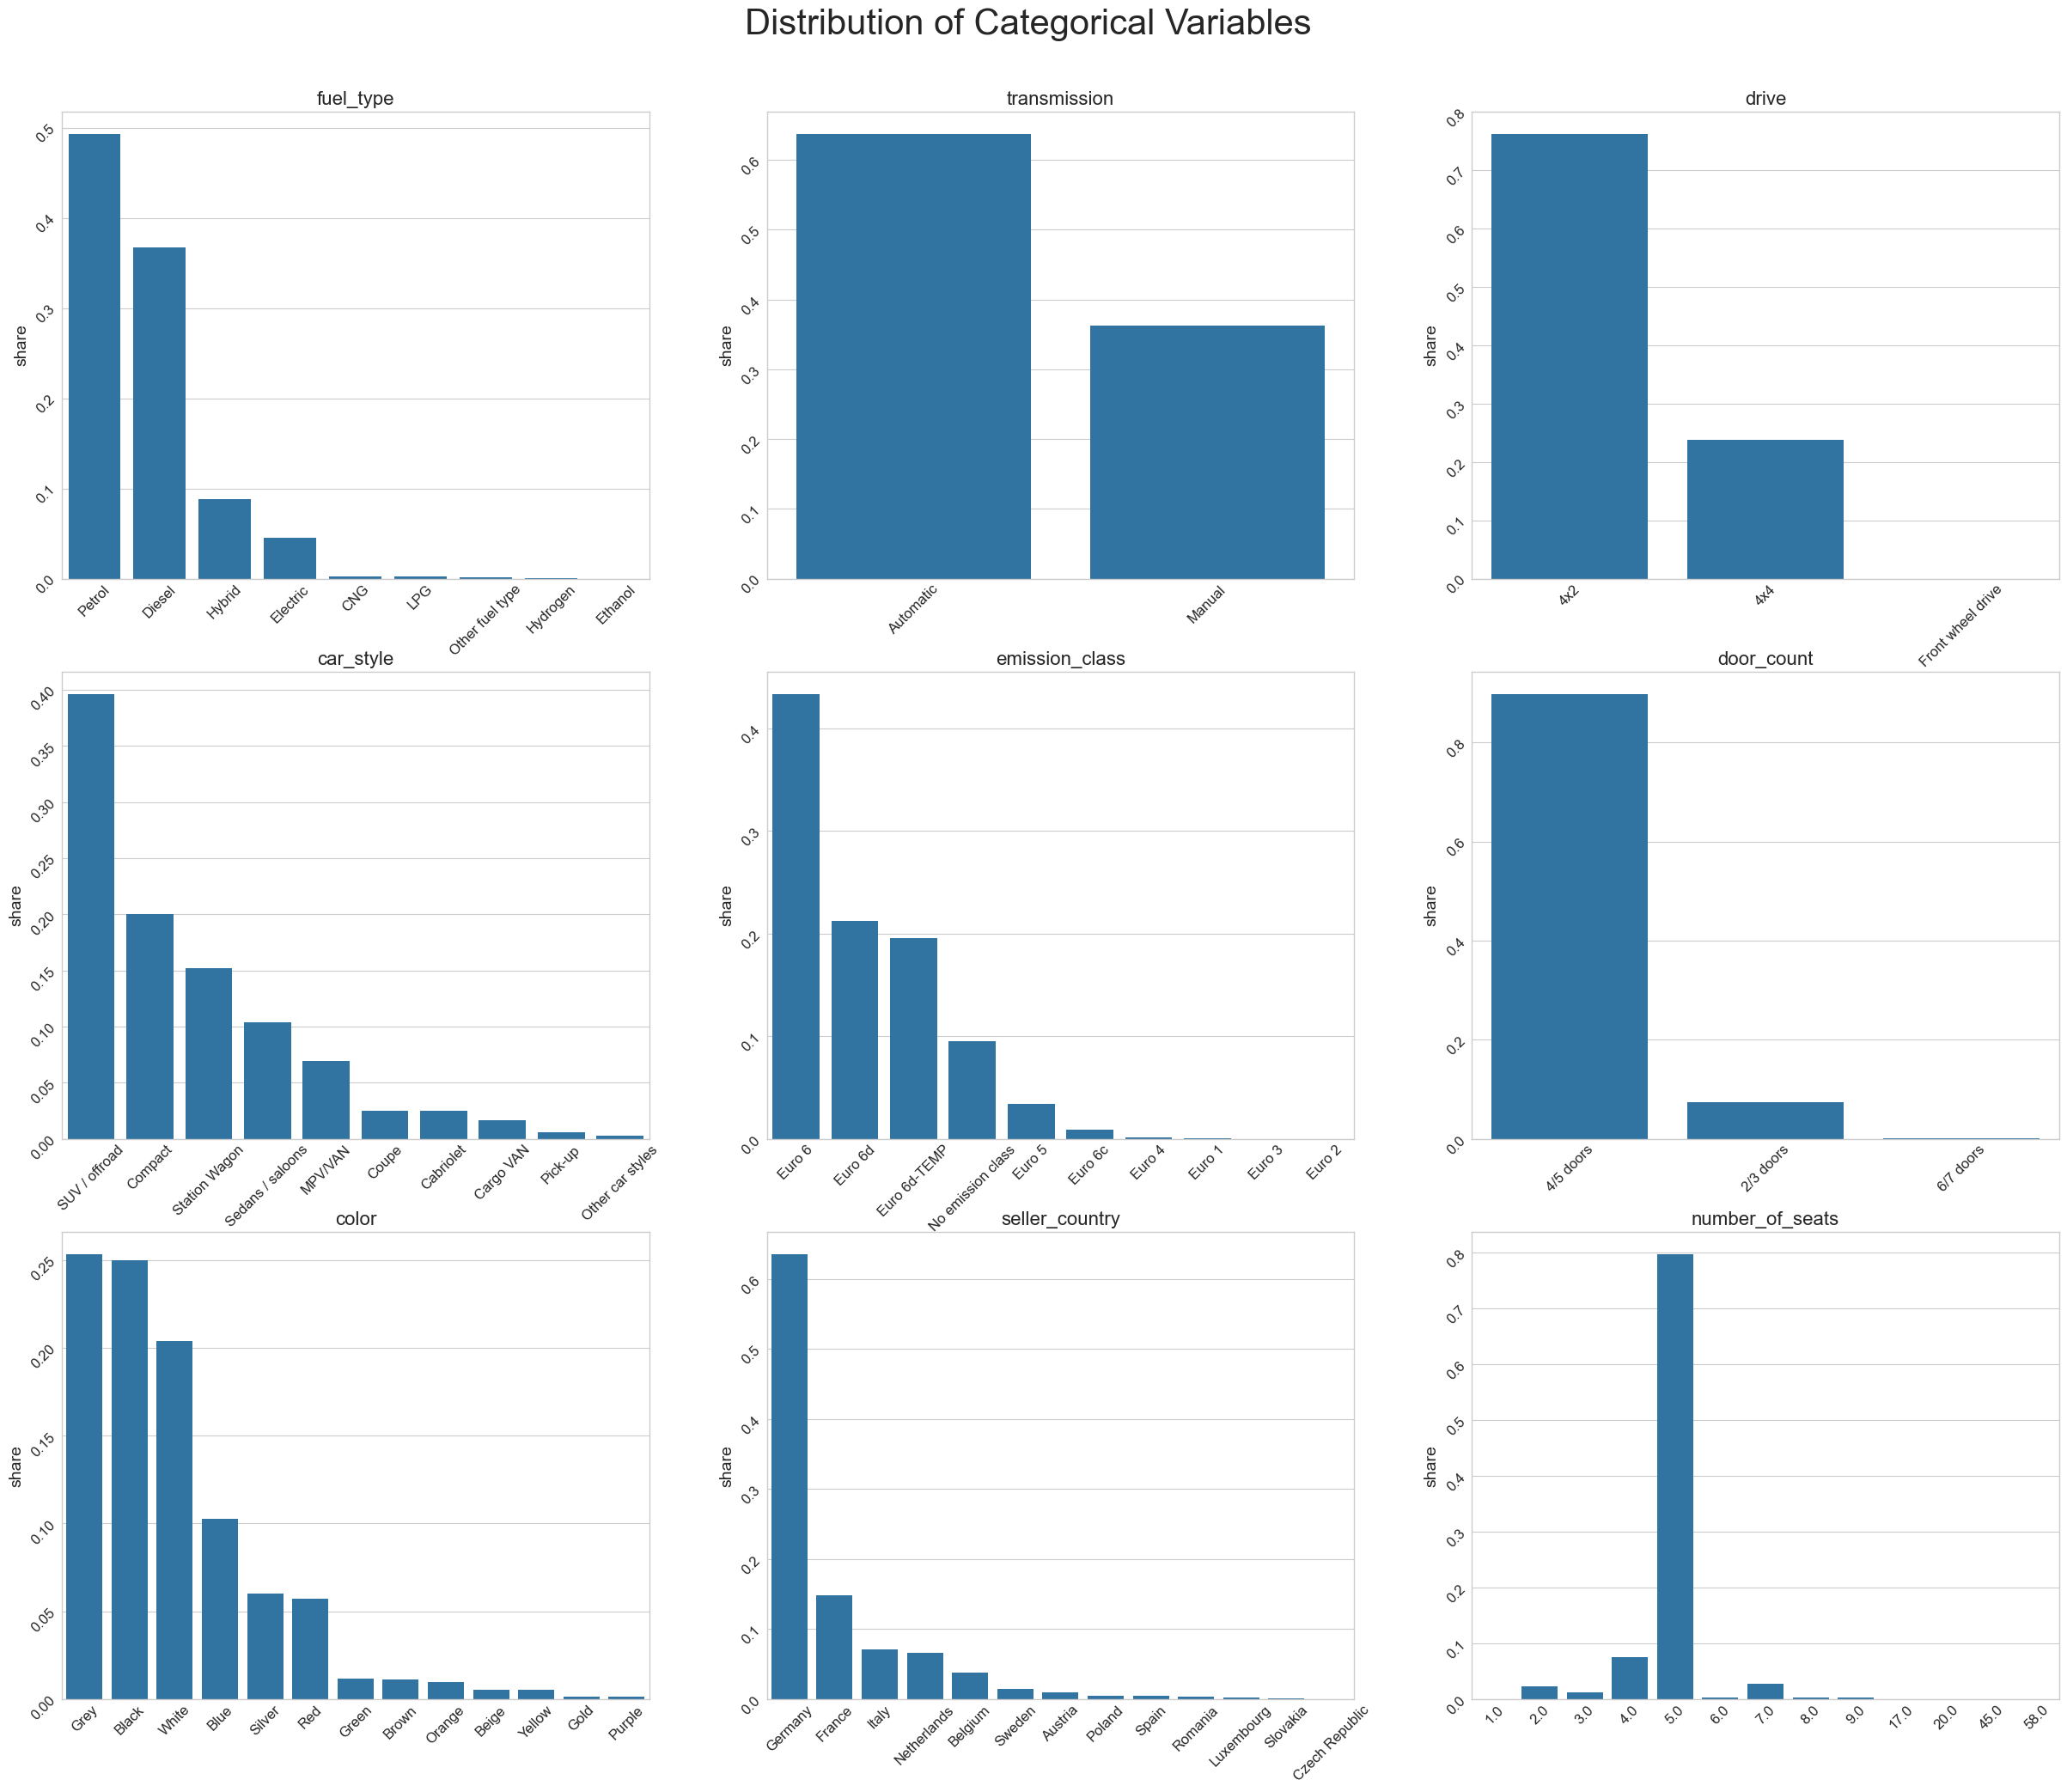

In [81]:
n_rows = math.ceil(len(cat_cols_grid) / 3)
fig, axes = plt.subplots(
    nrows=n_rows, 
    ncols=3, 
    figsize=(fig_width*3, 
             n_rows*fig_height))
fig.suptitle('Distribution of Categorical Variables', 
             fontsize=fontsize_grid, 
             y=y_grid)
row_ind = 0
col_ind = -1
for ind in range(len(cat_cols_grid)):
    row_ind = math.floor(ind / 3)
    col_ind += 1 
    df_share = create_share_df(df=data_woNA, 
                               col=cat_cols_grid[ind],
                               color=p_1_blue)
    sns.barplot(data=df_share, 
                x=df_share.index, 
                y="share", 
                color=p_1_blue,
                ax=axes[row_ind, col_ind])
    axes[row_ind, col_ind].tick_params(labelsize=12, labelrotation=45)
    axes[row_ind, col_ind].set_title(cat_cols_grid[ind], fontsize=16)
    axes[row_ind, col_ind].set_xlabel(xlabel=None)
    axes[row_ind, col_ind].set_ylabel(ylabel='share', fontsize=14)
    if col_ind == 2:
        col_ind = -1

Firstly, looking at the types of fuels of cars in the data set, most of the cars have engines fueld by exhaustion engines (almost 85 % of all observations), further slight majority of cars has automatic transmission. Almost 80 % of the cars has 2 wheel drive. Maybe a little bit suprisingly almost 40 % vehicles are off road/SUV vehicles, station wagons compacts and saloons have then together slightly over 45% share. Nevertheless, the SUV cars are gaining popularity in last few years and this number actually corresponds quite closely to how many newly registred cars were of this type in Czech Republic so there does not seem to be too big of a bias in selection in this case. Share of observations according to their car count also seem to be reasonable, most of the cars should be expected to have 4 or 5 doors because 2 vehicles are more typical for sport cars which should be naturally in a minority in our data set, similarly cars which have more than 5 doors are not found on the roads in high numbers. In regards to colour of cars in our data set, the share also correponds quite closely to the actual composition of vehicle types on Czech roads, most of the cars are either black, white or grey (together approximately 70% share). 

### Month of Registration and Month of Manufacture

There can be also found two variables in the date format in the data set. The month of registration and month of manufacture of vehicle. 

Text(0.5, 1.0, 'Distribution of Registration Dates')

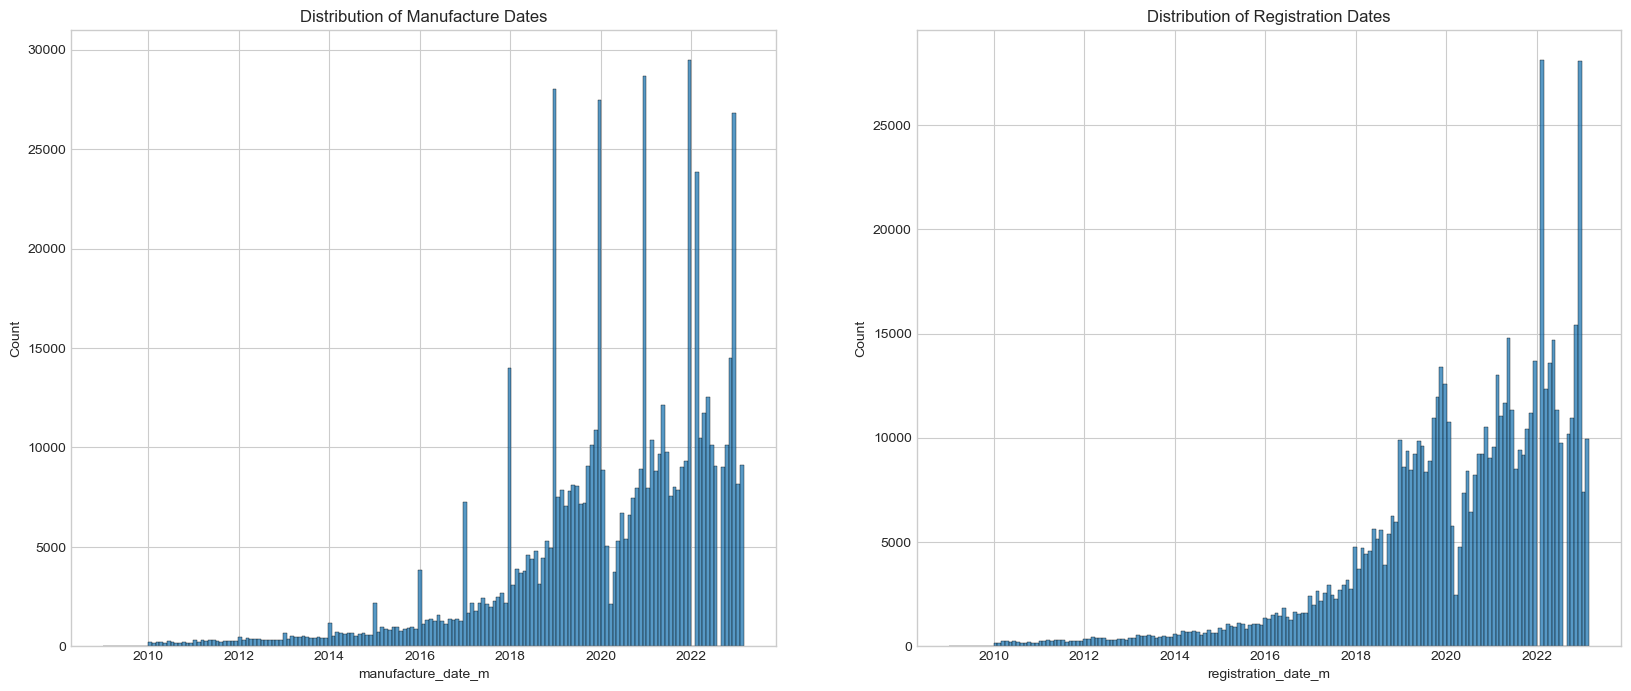

In [82]:
fig, ax = plt.subplots(figsize=(fig_width*2, fig_height), nrows=1, ncols=2)
years_fmt = DateFormatter('%Y')
data_woNA['manufacture_date'] = pd.to_datetime(
    data_woNA['manufacture_date'], dayfirst=True)
data_woNA['manufacture_date_m'] = (data_woNA['manufacture_date']
                              .dt
                              .to_period('M')
                              .dt
                              .to_timestamp())
sns.histplot(data_woNA,
             x='manufacture_date_m',
             bins=len(data_woNA['manufacture_date_m'].unique()), 
             ax=ax[0])
ax[0].set_title("Distribution of Manufacture Dates")
data_woNA['registration_date'] = pd.to_datetime(
    data_woNA['registration_date'], 
    dayfirst=True)
data_woNA['registration_date_m'] = (data_woNA['registration_date']
                               .dt
                               .to_period('M')
                               .dt
                               .to_timestamp())
sns.histplot(data_woNA, 
             x='registration_date_m',
             bins=len(data_woNA['registration_date_m'].unique()), 
             ax=ax[1])
ax[1].set_title("Distribution of Registration Dates")

We can see that majority of the cars in the data set are less than 5 years old at the time the data set was downloaded. At the first look it seems that the distributions of both variables are very similair, so there does not seems to be a big time lag between registration date after the date of manufacture.

In [83]:
#fig, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=1)
data_woNA["man_reg_diff"] = ((data_woNA['registration_date'] 
                             - data_woNA['manufacture_date'])
                               .dt
                               .days)

In [84]:
data_woNA["man_reg_diff"].value_counts().head(10)

man_reg_diff
0      577649
272       868
58        815
180       764
333       760
150       757
363       749
88        706
89        694
332       689
Name: count, dtype: int64

In [85]:
print("Correlation between date of registration and date of manufacturing: ")
data_woNA["manufacture_date"].corr(data_woNA['registration_date'])

Correlation between date of registration and date of manufacturing: 


0.9953875380177796

We can also look more closely on the relationship between date of manufacture and vehicle registration by looking on the distribution of difference between these two dates in days. At the first look it can be seen that in most cases these two days are identical which is also supported in correlation coefficient between these two variables which is close to 1. In conclusion, it seems that it makes sense to choose only one of the variables for the vehicle price prediction because they both contain almost identical information. However, this finding also rises a question about the quality of the data at least in this specific regard because it is obviously highly improbable that majority of the cars in the data set were registered the day there were manufactured.  

Number of cars less than 6 months old: 58616


Text(0.5, 1.0, 'Distribution of Used Cars in the Last 6 Months')

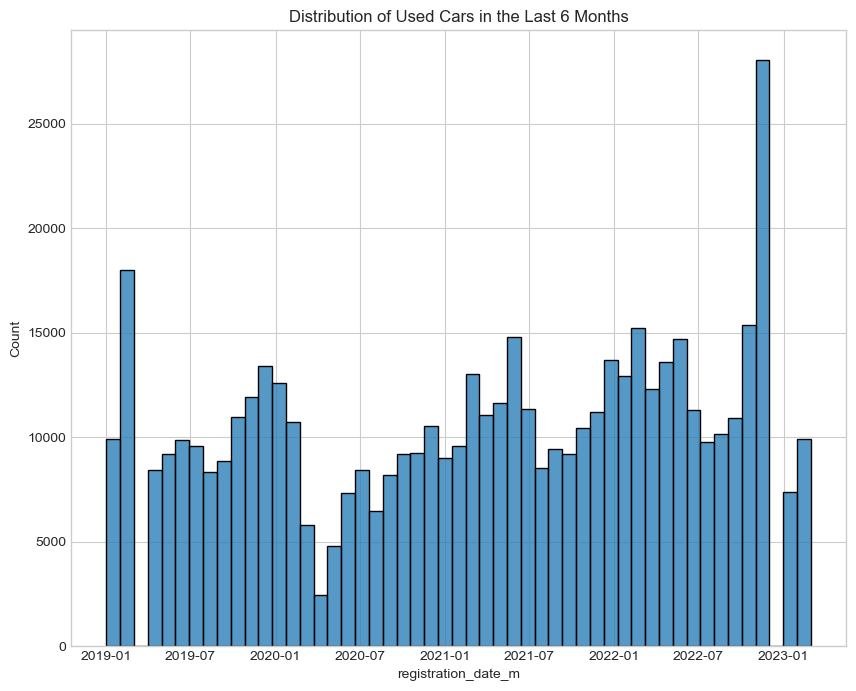

In [86]:
data_woNA["vehicle_age"] = (date_download 
                            - data_woNA['manufacture_date'])
fig, ax = plt.subplots(figsize=(fig_width, fig_height), nrows=1, ncols=1)
sns.histplot(data_woNA[data_woNA['registration_date_m'].dt.year > 2018], 
             x='registration_date_m',
             bins=(len(data_woNA['registration_date_m'][data_woNA['registration_date_m'].dt.year > 2018].unique())))
date_6_months = date_download - datetime.timedelta(days=150)
n_6months = data_woNA[data_woNA["manufacture_date"] > date_6_months].shape[0]
print("Number of cars less than 6 months old: " + str(n_6months))
ax.set_title("Distribution of Used Cars in the Last 6 Months")

Looking more closely on the distribution of observations since the beginning of 2019, we can see that there is overpresentation of very new cars, less than 6 months old.   

## Numeric Variables

The next section deals with numerical variables found in the data set.

In [87]:
data_woNA.describe()

,id,cubic_capacity,power,number_of_seats,fuel_consumption_combined,carbon_dioxide_emission,registration_date,mileage,manufacture_date,price,feature_count,manufacture_date_m,registration_date_m,man_reg_diff,vehicle_age
count,672826.000,643259.000,672825.000,635844.000,651834.000,672768.000,672826,672826.000,672826,672826.000,672826.000,672826,672826,672826.000,672826
mean,53447568.572,1760.319,128.505,4.909,5.695,125.464,2020-04-18 09:25:21.733107968,40339.856,2020-03-22 01:39:25.324764160,882647.090,35.347,2020-03-21 21:00:00.802584832,2020-04-15 16:29:29.838858752,27.324,1096 days 22:20:34.675235536
min,38982.000,0.000,4.000,1.000,0.000,0.000,2009-01-01 00:00:00,0.000,2009-01-01 00:00:00,66990.000,0.000,2009-01-01 00:00:00,2009-01-01 00:00:00,0.000,22 days 00:00:00
25%,52929597.250,1332.000,85.000,5.000,4.600,109.000,2019-03-01 00:00:00,10548.000,2019-01-01 00:00:00,522990.000,26.000,2019-01-01 00:00:00,2019-03-01 00:00:00,0.000,447 days 00:00:00
50%,54098121.500,1598.000,110.000,5.000,5.100,125.000,2020-10-01 00:00:00,29500.000,2020-10-01 00:00:00,719990.000,37.000,2020-10-01 00:00:00,2020-10-01 00:00:00,0.000,904 days 00:00:00
75%,54592347.750,1993.000,143.000,5.000,6.100,147.000,2022-02-01 00:00:00,60600.000,2022-01-01 00:00:00,1009990.000,46.000,2022-01-01 00:00:00,2022-02-01 00:00:00,0.000,1543 days 00:00:00
max,54875522.000,83590.000,588.000,58.000,809.000,1258.000,2023-03-17 00:00:00,175000.000,2023-03-02 00:00:00,12491990.000,77.000,2023-03-01 00:00:00,2023-03-01 00:00:00,3500.000,5195 days 00:00:00
std,2118870.493,695.243,68.717,0.748,3.887,49.364,NaN,37238.677,NaN,678227.206,14.462,NaN,NaN,80.287,836 days 21:14:28.014388032


Looking at the summary statistics of numerical variables, we can see that in case of some variables we can find values in the data set that are not realistic. The examples being cubic capacity 0 or over 40000 or 58 seats in a vehicle so some additional data cleaning is definitely needed. Additionally, it is worth mentioning that there are also some vehicles with 0 mileage in the data set

### Distributions

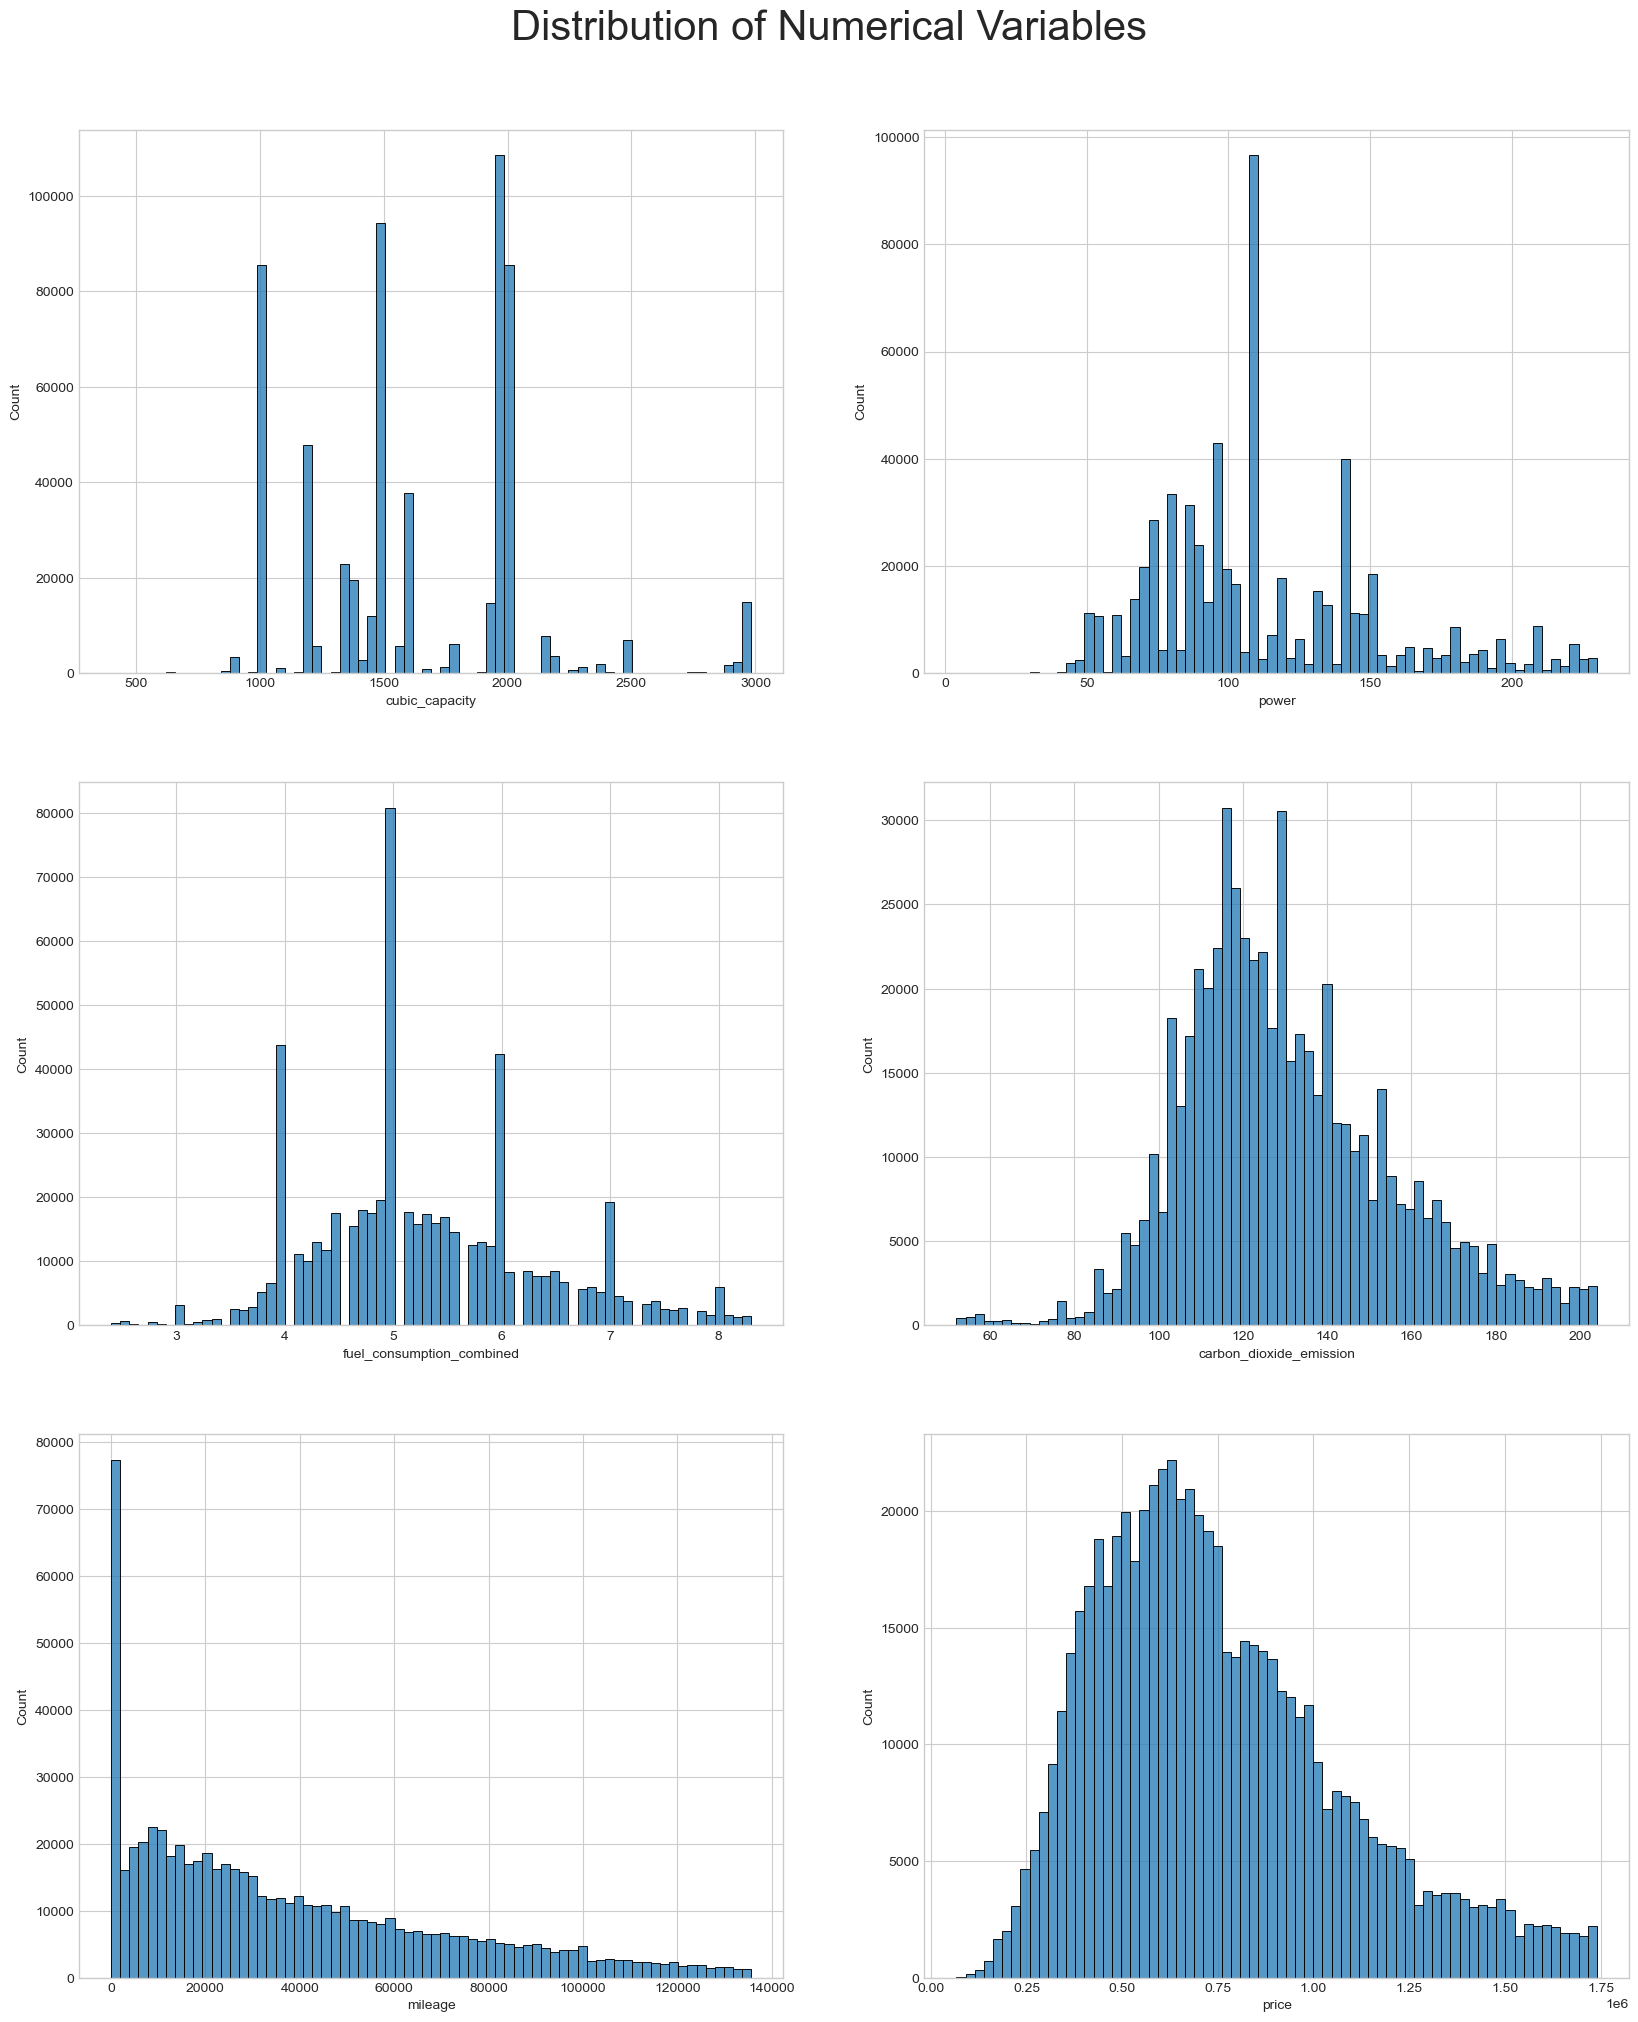

In [88]:
n_rows = math.ceil(len(numerical_cols_grid) / 2)
fig, axes = plt.subplots(nrows=n_rows, 
                         ncols=2, 
                         figsize=(fig_width * 2, 
                                  fig_height*n_rows))
fig.suptitle('Distribution of Numerical Variables', 
             fontsize=fontsize_grid, 
             y=y_grid)
row_ind = 0
col_ind = -1
for ind in range(len(numerical_cols_grid)):
    row_ind = math.floor(ind / 2)
    col_ind += 1 
    data_filtered= filter_outliers(df=data_woNA, col=numerical_cols_grid[ind])
    sns.histplot(data=data_filtered, 
                 x=numerical_cols_grid[ind],
                 ax=axes[row_ind, col_ind], 
                 bins=70)
    if col_ind == 1:
        col_ind = -1

We can also look at the distribution of individual numerical variables with filtered out outliers to better see the individual variables distributions. In case of cubic capacity, it can be seen that there only handfull of distinct  values that the observations attain, with most cars having cubic capacity of engine cylinder of 2 litres, followed by 1.5 litre and 1 litre. In case of power there is much higher variability but there is again one value of power which stands out - 110 kw with almost 100 000 observations. Fuel consumption distribution resembles standard distribution with the mean approximately equating to 5 litres per 100 km. In overall, it seems that for almost all numerical variables the distribution covers the range of values and their individual shares that can be expected on the real used car market. These distributions relate to the fact that most of the vehicles should be family cars and SUVs with only minority of the cars being sports cars and large vehicles similiarly to the true state of the market. The exception to this rule  seems to be the mileage of vehicle which distribution is moved to the right in comparison with the overall market distribution. 

## Relationship between price and other variables

### Categorical Vars

In the next section, the relationship between distribution of price and different values of categorical variables is explored.

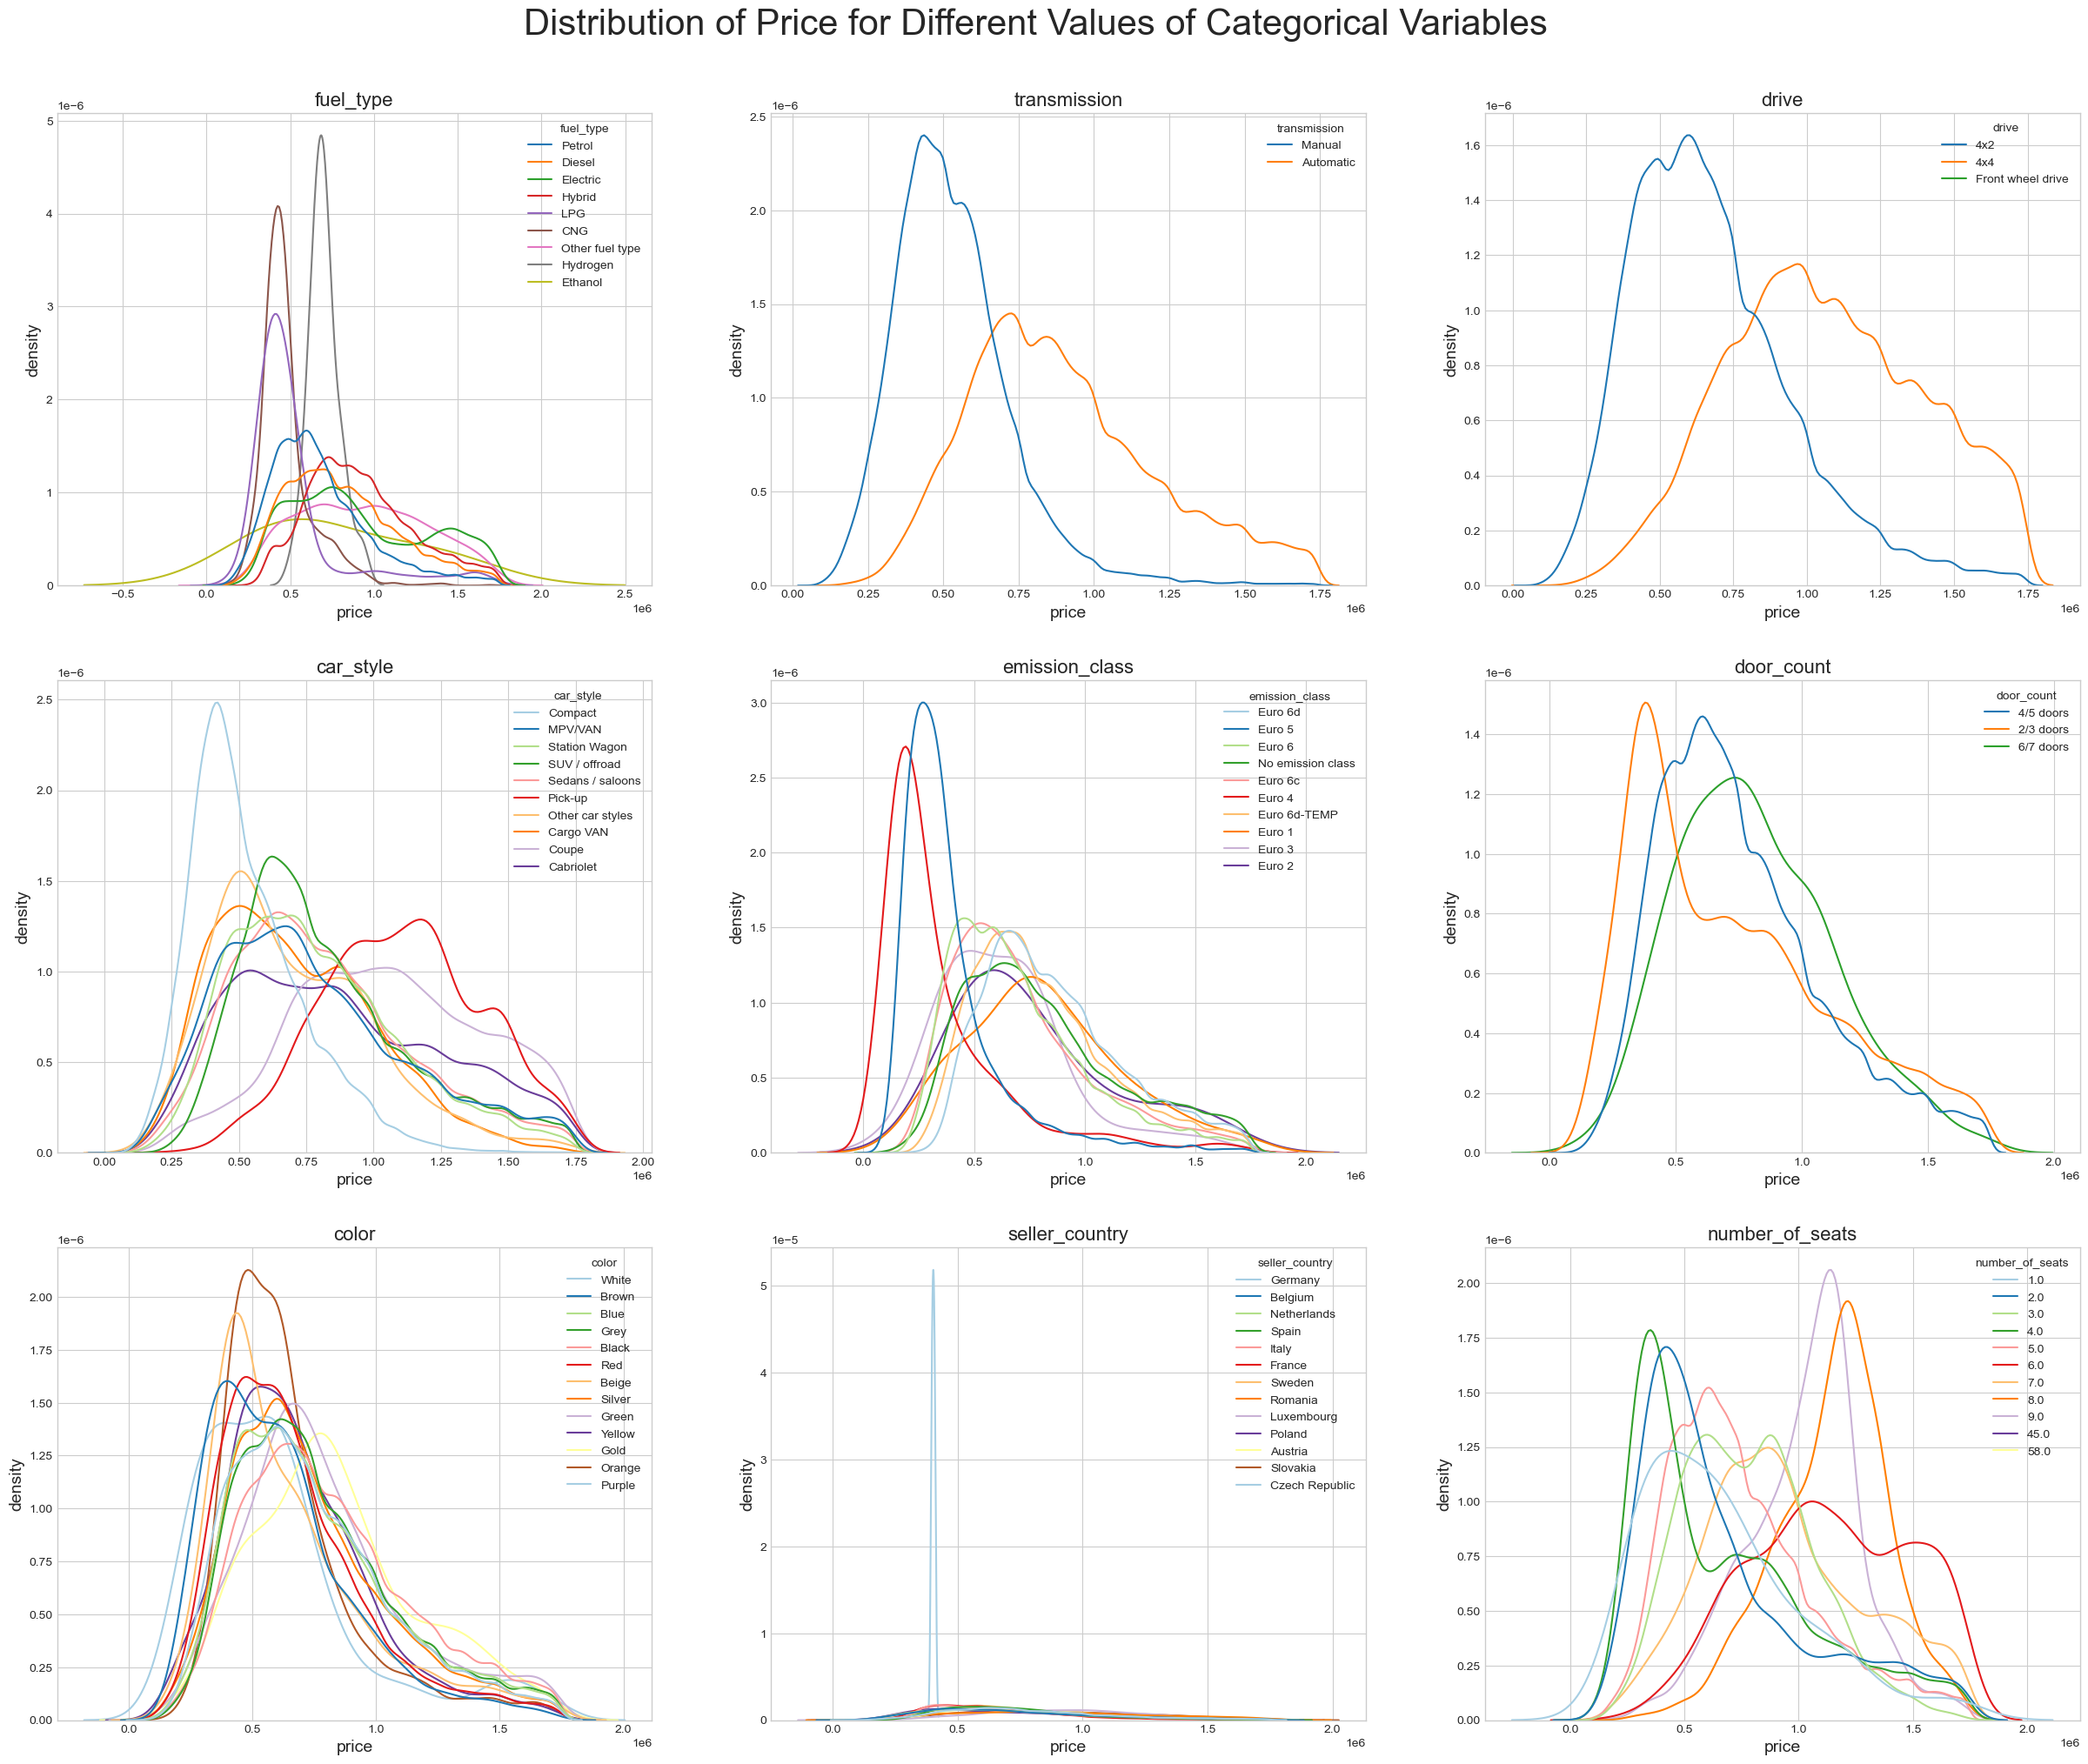

In [89]:
n_rows = math.ceil(len(cat_cols_grid) / 3)
fig, axes = plt.subplots(nrows=n_rows, 
                         ncols=3, 
                         figsize=(fig_width * 3, 
                                  fig_height * n_rows))
fig.suptitle('Distribution of Price for Different Values of Categorical Variables', 
             fontsize=fontsize_grid, 
             y=y_grid)
row_ind = 0
col_ind = -1
data_filtered = filter_outliers(df=data_woNA, col="price") 
for ind in range(len(cat_cols_grid)):
    row_ind = math.floor(ind / 3)
    col_ind += 1 
    if len(data_woNA[cat_cols_grid[ind]].unique()) < 11:
        palette_ = palette_1
    else:
        palette_ = palette_2
    sns.kdeplot(data=data_filtered, 
                x="price", 
                hue=cat_cols_grid[ind],
                ax=axes[row_ind, col_ind], 
                common_norm=False, 
                palette=palette_)
    axes[row_ind, col_ind].set_title(cat_cols_grid[ind], fontsize=16)
    axes[row_ind, col_ind].set_xlabel(xlabel='price', fontsize=14)
    axes[row_ind, col_ind].set_ylabel(ylabel='density', fontsize=14)
    if col_ind == 2:
        col_ind = -1

We can see that the distribution of price for different values of categorical variables in some cases differs significantly. In case of emission standard this is most probably from big part drived by the correlation of the variable with the age of the vehicle and it is a question how much it will make difference all other variables held constant. On the other hand, for example,  in case of variable describing the type of tranmission in vehicle, there seems to be potential for it to explain significant portion of variation in price of vehicles. 

### Numerical Vars

Lastly, I explore the relationship between numerical variables and price.

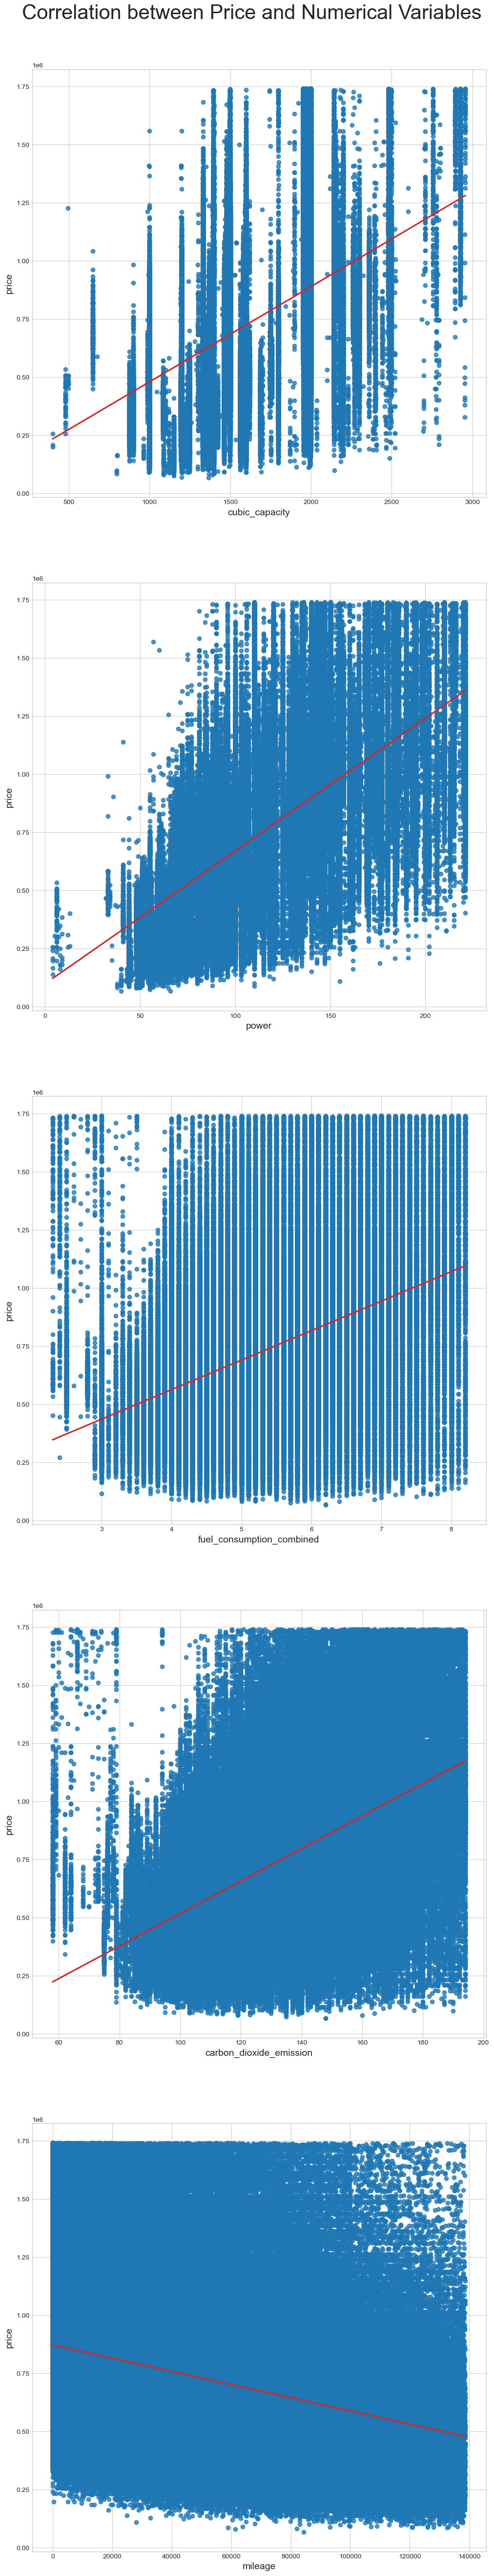

In [90]:
n_rows = len(numerical_cols_grid) - 1
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(12, 66))
fig.suptitle('Correlation between Price and Numerical Variables',           
             fontsize=fontsize_grid, 
             y=0.9)
row_ind = -1
col_ind = -1
df_filtered = filter_outliers(df=data_woNA, col="price") 
for ind in range(len(numerical_cols_grid)):
    if numerical_cols_grid[ind] == "price":
        continue
    row_ind += 1
    df_filtered_2 = filter_outliers(df=data_filtered, 
                                    col=numerical_cols_grid[ind])
    sns.regplot(data=df_filtered_2, 
                x=numerical_cols_grid[ind],  
                y="price",
                ax=axes[row_ind], 
                scatter_kws={"color": p_1_blue}, 
                line_kws={"color": p_1_red})
    axes[row_ind].set_xlabel(xlabel=numerical_cols_grid[ind], fontsize=14)
    axes[row_ind].set_ylabel(ylabel='price', fontsize=14)

The relationship between numerical variables and the price are mostly as expected. Cubic capacity and power are positively correlated with the price. In case of fuel consumption one can expected it to be negatively correlated with price but that should be only in case that all other variables which are correlated with it and price at the same time are controlled for (engine power...). So in this case the positive correlation also does not necessarly indicate a problem with the data set. Similiar line of thought can be applied to relationship of carbon dioxide emissions  with price.

# Summary

In conclusion, with the exception of the data on car equipment and 2 other variables (equipement version and number of owners), the data set seem to be sufficently complete. Moreover, the distribution of the variables in the data set seem to be in accordance with what one could except from the real used car market, the prevailing types of cars are SUVs and sedans, distributions of power, number of seats and doors corresponds to this fact. The only two significant anomalies are variables mileage and age of vehicle whose averages are much lower in the data set than on the real used car market. Nevertheless, this first data exploration indicates that the model trained on the data set could generalize quite well on other used car market data sets. 